# Lista 1 (9 pkt.)

In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np

## Zadanie 1 (1 pkt.)

Zaimplementuj szyfr Cezara. Napisz funkcję $\textit{Cezar(tekst, klucz)}$ tak aby jako argumenty przyjmowała tekst do zaszysfrowania oraz klucz a zwracała zaszyfrowany tekst. Funkcja ta dostając jako argumenty zaszyfrowany tekst oraz -klucz (klucz, ktorym zaszyfrowano tekst ze znakiem minus) będzie zwracała odszyfrowany tekst. Funkcja powinna przejść testy, czyli powinna 8 razy zwrócić $\textit{True}$.

Pamiętaj o polskich znakach. Szyfrujemy tylko litery, natomiast cyfry, znaki interpunkcyjne i białe znaki zostają bez zmian. Wielkie litery po zaszyfrowaniu są również wielkie. Użyj poniższego alfabetu.

In [2]:
alfabet=['a','ą', 'b', 'c', 'ć', 'd', 'e', 'ę', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'ł',
             'm', 'n', 'ń', 'o','ó', 'p', 'q','r', 's', 'ś', 't', 'u','v', 'w', 'x','y', 'z','ź','ż']

Przy implementacji mogą być przydatne takie elementy biblioteki string jak: $\textit{string.punctuation, string.whitespace, string.digits, upper(), lower(), isupper()}$.

In [3]:
len(alfabet)

35

In [4]:
''.join(['a', 'b', 'c'])

'abc'

In [5]:
def Cezar(tekst,klucz):
    
    L = len(alfabet)
    
    def is_letter(char):
        
        def is_punctuation():
            return string.punctuation.find(char) != -1
        
        def is_digit():
            return string.digits.find(char) != -1
        
        def is_whitespace():
            return string.whitespace.find(char) != -1
        
        return not (is_punctuation() or is_digit() or is_whitespace())
    
    def letter_position(letter):
        return alfabet.index(letter.lower())
    
    def encode(char):
        if not is_letter(char):
            return char
        
        new_position = (letter_position(char) + klucz) % L
        
        if char.isupper():
            return alfabet[new_position].upper()
        return alfabet[new_position]
    
    return ''.join([encode(c) for c in tekst])
        

In [6]:
print(Cezar('Ala ma kota.',3)=='Cnc oc mqwc.')
print(Cezar('Ala ma kota.',20)=='Óżó ąó źćió.')
print(Cezar('Ala ma 2 koty.',5)=='Dod pd 2 ńsyą.')
print(Cezar('Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.',7)
                  =='Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.')
print(Cezar('Cnc oc mqwc.',-3)=='Ala ma kota.')
print(Cezar('Óżó ąó źćió.',-20)=='Ala ma kota.')
print(Cezar('Dod pd 2 ńsyą.',-5)=='Ala ma 2 koty.')
print(Cezar('Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.',-7)
                  =='Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 2 (1 pkt.)

Wiedząc, że poniższy tekst zaszyfrowano metodą Cezara, odszyfruj go metodą "brute force". Co to za cytat?

In [7]:
tekst='Hćcrek okyź hćęy? Okzpń sńóź rsńk t źt sńk vcźę, ąńkr. Okzpń vcźęofhkrż żyńqżol ącźqżręhćci, sńk ąńkr.'

In [8]:
[Cezar(tekst, i) for i, _ in enumerate(alfabet)]

['Hćcrek okyź hćęy? Okzpń sńóź rsńk t źt sńk vcźę, ąńkr. Okzpń vcźęofhkrż żyńqżol ącźqżręhćci, sńk ąńkr.',
 'Idćsęl ólzż idfz? Ólźqo śopż sśol u żu śol wćżf, bols. Ólźqo wćżfógilsa azoraół bćżrasfidćj, śol bols.',
 'Jedśfł płźa jegź? Płżró tóqa śtół v av tół xdag, cółś. Płżró xdagphjłśą ąźósąpm cdasąśgjedk, tół cółś.',
 'Kęetgm qmżą kęhż? Qmasp uprą tupm w ąw upm yeąh, ćpmt. Qmasp yeąhqikmtb bżpśbqn ćeąśbthkęel, upm ćpmt.',
 'Lfęuhn rnab lfia? Rnąśq vqsb uvqn x bx vqn zębi, dqnu. Rnąśq zębirjlnuc caqtcrń dębtcuilfęł, vqn dqnu.',
 'Łgfviń sńąc łgją? Sńbtr wrśc vwrń y cy wrń źfcj, erńv. Sńbtr źfcjskłńvć ćąrućso efcućvjłgfm, wrń erńv.',
 'Mhgwjo śobć mhkb? Śocus xstć wxso z ćz xso żgćk, ęsow. Śocus żgćkślmowd dbsvdśó ęgćvdwkmhgn, xso ęsow.',
 'Nihxkó tócd nilc? Tóćvś yśud xyśó ź dź yśó ahdl, fśóx. Tóćvś ahdltłnóxe ecśwetp fhdwexlnihń, yśó fśóx.',
 'Ńjiylp upće ńjłć? Updwt ztve yztp ż eż ztp ąieł, gtpy. Updwt ąiełumńpyę ęćtxęuq giexęyłńjio, ztp gtpy.',
 'Okjzłq vqdę okmd? Vqexu źuwę zźuq a

### Odpowiedź

 > 'Czymże jest czas? Jeśli nikt mnie o to nie pyta, wiem. Jeśli pytającemu usiłuję wytłumaczyć, nie wiem.',

## Zadanie 3 (2 pkt.)

Plik $\textit{'ksiazka1.txt'}$ zawiera tekst pewnej książki zaszyfrowany metodą Cezara. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Do wczytania pliku mozesz użyć poniższego kodu.

In [9]:
plik=open('ksiazka1.txt')
ksiazka=plik.read()
plik.close()

Słownik $czestoliwosc$ zawiera czestotliwości występowania liter w języku polskim.

In [10]:
czestotliwosc={'a':0.0891,'ą':0.0099, 'b':0.0147, 'c':0.0396, 'ć':0.004, 'd':0.0325, 'e':0.0766, 'ę':0.0111,
            'f':0.003, 'g':0.0142, 'h':0.0108, 'i':0.0821, 'j':0.0228, 'k':0.0351, 'l':0.021, 'ł':0.0182,'m':0.028,
            'n':0.0552, 'ń':0.002, 'o':0.0775,'ó':0.0085, 'p':0.0313, 'q':0.0014, 'r':0.0469, 's':0.0432,'ś':0.0066,
            't':0.0398, 'u':0.025, 'v': 0.0004, 'w':0.0465 ,'x':0.0002,'y':0.0376, 'z':0.0564,'ź':0.0006,'ż':0.0083}

<BarContainer object of 35 artists>

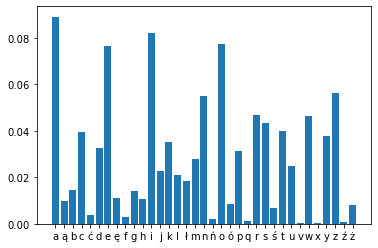

In [11]:
plt.bar(czestotliwosc.keys(),czestotliwosc.values())

<BarContainer object of 35 artists>

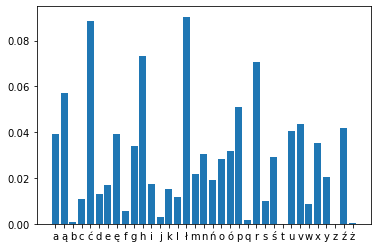

In [12]:
from collections import Counter
counts = Counter(ksiazka)

# Ujednolicenie do samych małych liter
def clear_dict(d):
    new_dict = dict.fromkeys(alfabet, 0)
    for char in d.keys():
        if char.lower() in alfabet:
            new_dict[char.lower()] += d[char]
    return new_dict

counts = clear_dict(counts)
letter_qty = sum(counts.values())
counts = {letter: counts[letter] / letter_qty for letter in counts.keys()}

plt.bar(counts.keys(), counts.values())

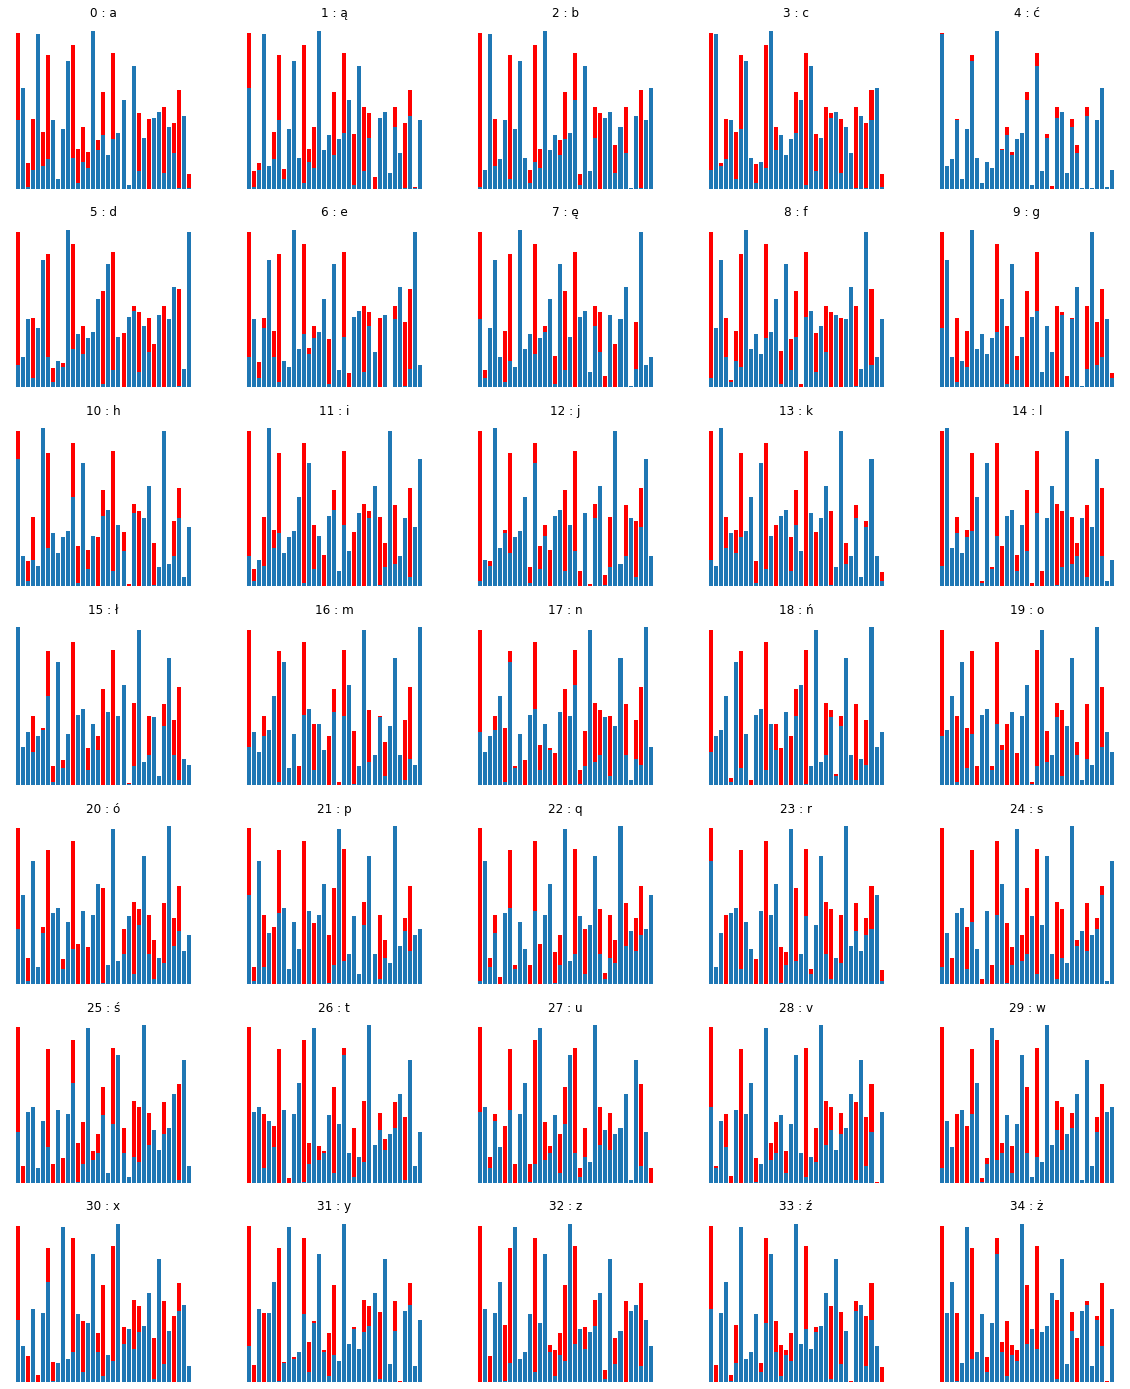

In [13]:
fig, ax = plt.subplots(7, 5, figsize=(20, 25))
[axi.set_axis_off() for axi in ax.ravel()]

def rotate(a_list, key):
    return a_list[key:] + a_list[0:key]

for (x, y) in ((i, j) for i in range(7) for j in range(5)):
    axi = ax[x, y]
    key = x*5 + y
    axi.set_title(f"{key} : {alfabet[key]}")
    axi.bar(czestotliwosc.keys(), czestotliwosc.values(), color='red')
    axi.bar(counts.keys(), rotate(list(counts.values()), key))

### Odpowiedź

Klucz to 4, do odszyfrowania można podać -4.

In [14]:
print(Cezar(ksiazka[0:1000], -4))

Tom I



Wstęp

W północno-wschodnim kącie Afryki leży Egipt, ojczyzna najstarszej cywilizacji w świecie. Przed trzema, czterema, a nawet pięcioma tysiącami lat, kiedy w środkowej Europie odziani w surowe skóry barbarzyńcy kryli się po jaskiniach, Egipt - już posiadał wysoką organizację społeczną, rolnictwo, rzemiosła i literaturę. Nade wszystko zaś wykonywał olbrzymie prace inżynierskie i wznosił kolosalne budowle, których szczątki budzą podziw w technikach nowożytnych.

Egipt - jest to żyzny wąwóz między pustynią Libijską i Arabską. Głębokość jego wynosi kilkaset metrów, długość sto trzydzieści mil, średnia szerokość zaledwo milę. Od zachodu - łagodne, ale nagie wzgórza libijskie, od wschodu strome i popękane skały arabskie są ścianami tego korytarza, którego dnem płynie rzeka - Nil.

Z biegiem rzeki, na północ, ściany wąwozu zniżają się, a w odległości dwudziestu pięciu mil od Morza Śródziemnego nagle rozchodzą się, i Nil, zamiast płynąć ciasnym korytarzem, rozlewa się kilkoma ramio

## Zadanie 4 (2 pkt.)

Napisz dwie funkcje, szyfrującą i deszyfrującą, dla szyfru Vignere'a. Funkcja $\textit{Vignere_zaszyfruj(tekst, klucz)}$ przyjmuje jako argumenty tekst do zaszyfrowania oraz klucz w postaci słowa. Podobnie funkcja $\textit{Vignere_odszyfruj(tekst, klucz)}$ przyjmuje jako argumenty tekst zaszyfrowany oraz klucz w postaci słowa. Może być przydatne skorzystanie z zamiany liter na liczby (tzn. na liczby określające pozycję litery w alfabecie):

In [15]:
liczb_do_lit=dict()
lit_do_liczb=dict()
for i,l in enumerate(alfabet):
    liczb_do_lit[i]=l
    lit_do_liczb[l]=i

In [16]:
import itertools

def Vignere_zaszyfruj(tekst,klucz):
    
    encoded_text = []
    key_iter = itertools.cycle(map(lambda c: lit_do_liczb[c], klucz))
    
    for c in tekst:
        if c.lower() not in alfabet:
            encoded_text.append(c)
            continue
            
        new_pos = (next(key_iter) + lit_do_liczb[c.lower()]) % len(alfabet)
            
        if c.isupper():
            encoded_text.append(liczb_do_lit[new_pos].upper())
        else:
            encoded_text.append(liczb_do_lit[new_pos])
                                         
    return ''.join(encoded_text)

In [17]:
def Vignere_odszyfruj(tekst,klucz):
    
    decoded_text = []
    key_iter = itertools.cycle(map(lambda c: -lit_do_liczb[c], klucz))
    
    for c in tekst:
        if c.lower() not in alfabet:
            decoded_text.append(c)
            continue
            
        new_pos = (next(key_iter) + lit_do_liczb[c.lower()]) % len(alfabet)
            
        if c.isupper():
            decoded_text.append(liczb_do_lit[new_pos].upper())
        else:
            decoded_text.append(liczb_do_lit[new_pos])
                                         
    return ''.join(decoded_text)

In [18]:
print(Vignere_zaszyfruj('Ala ma kota.','ela')=='Eva ql kśda.')
print(Vignere_zaszyfruj('Ala ma kota.','tygrys')=='Thg ćy bhqg.')
print(Vignere_zaszyfruj('Ala ma 2 koty.','indywidualistyczny')=='Iyd jw 2 ssńy.')
print(Vignere_zaszyfruj('Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.','asnyk')
                  =='Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.')
print(Vignere_odszyfruj('Eva ql kśda.','ela')=='Ala ma kota.')
print(Vignere_odszyfruj('Thg ćy bhqg.','tygrys')=='Ala ma kota.')
print(Vignere_odszyfruj('Iyd jw 2 ssńy.','indywidualistyczny')=='Ala ma 2 koty.')
print(Vignere_odszyfruj('Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.','asnyk')
                  =='Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 5 (3 pkt.)

Plik $\textit{'ksiazka2.txt'}$ zawiera tekst pewnej książki zaszyfrowany metodą Vignere'a. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Wskazówka I: Zauważ, że w metodzie Vignere'a co $n$-ta litera (gdzie $n$ to długośc klucza) jest zaszyfrowana metodą Cezara.

Wskazówka II: Najpierw ustal długość klucza $n$.

Do wczytania pliku mozesz użyć poniższego kodu.

In [19]:
plik=open('ksiazka2.txt')
ksiazka=plik.read()
plik.close()

<BarContainer object of 35 artists>

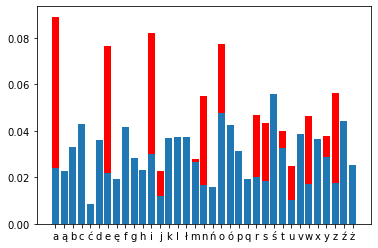

In [20]:
from collections import Counter

counts = Counter(ksiazka)

# Ujednolicenie do samych małych liter
def clear_dict(d):
    new_dict = dict.fromkeys(alfabet, 0)
    for char in d.keys():
        if char.lower() in alfabet:
            new_dict[char.lower()] += d[char]
    return new_dict

counts = clear_dict(counts)
letter_qty = sum(counts.values())
counts = {letter: counts[letter] / letter_qty for letter in counts.keys()}

plt.bar(czestotliwosc.keys(), czestotliwosc.values(), color='red')
plt.bar(counts.keys(), counts.values())

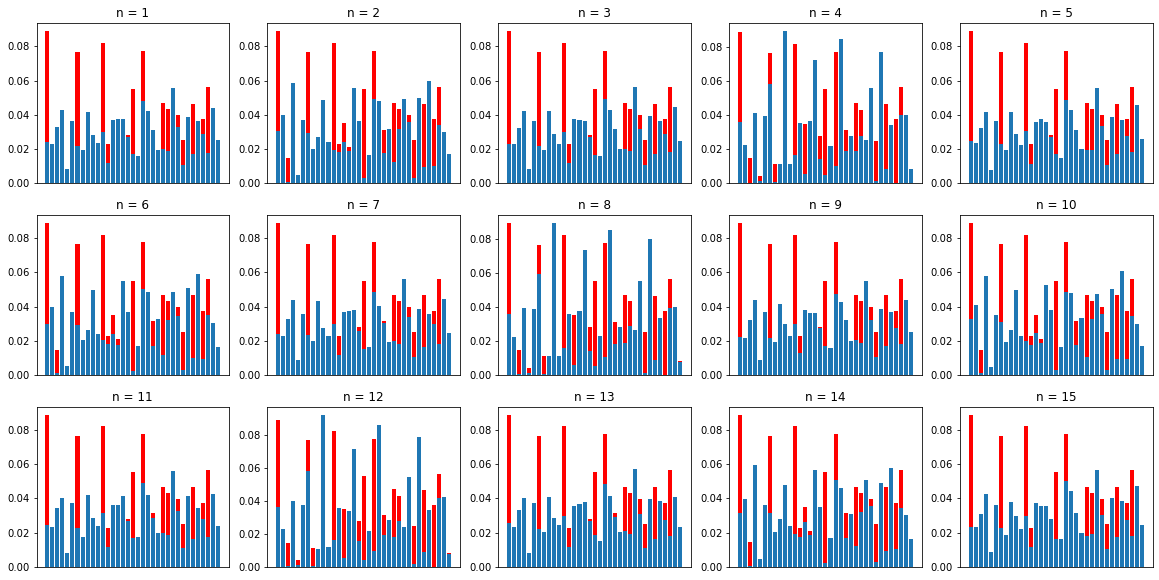

In [21]:
from collections import Counter

def clear_dict(d):
    new_dict = dict.fromkeys(alfabet, 0)
    for char in d.keys():
        if char.lower() in alfabet:
            new_dict[char.lower()] += d[char]
    return new_dict

def clear_text(text):
    return ''.join([c for c in text if c.isalpha()])

fig, ax = plt.subplots(3, 5, figsize=(20, 10))
[axi.get_xaxis().set_visible(False) for axi in ax.ravel()]

for (x, y) in ((i, j) for i in range(3) for j in range(5)):
    axi = ax[x, y]
    n = 5*x + y + 1
    
    axi.set_title(f"n = {n}")
    
    only_letters_text = clear_text(ksiazka)
    counts = Counter(only_letters_text[::n])
    
    counts = clear_dict(counts)
    letter_qty = sum(counts.values())
    counts = {letter: counts[letter] / letter_qty for letter in counts.keys()}
    
    axi.bar(czestotliwosc.keys(), czestotliwosc.values(), color='red')
    axi.bar(counts.keys(), counts.values())

### Zakładam długość klucza = 4.

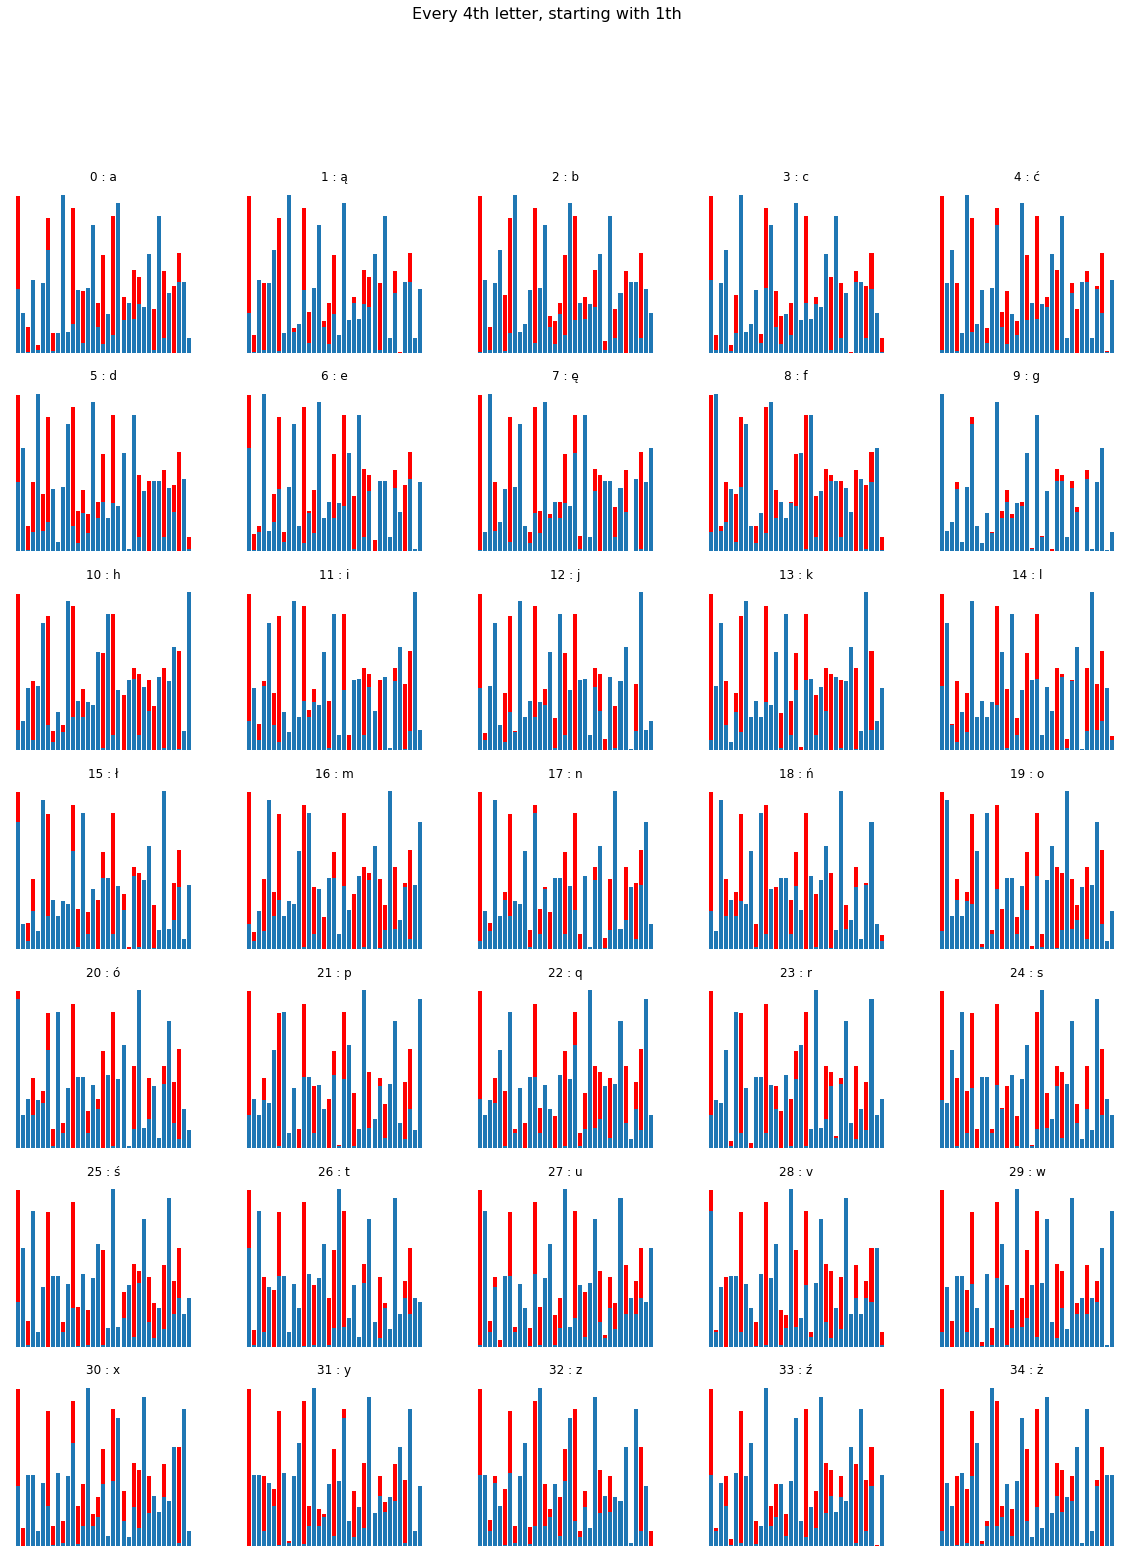

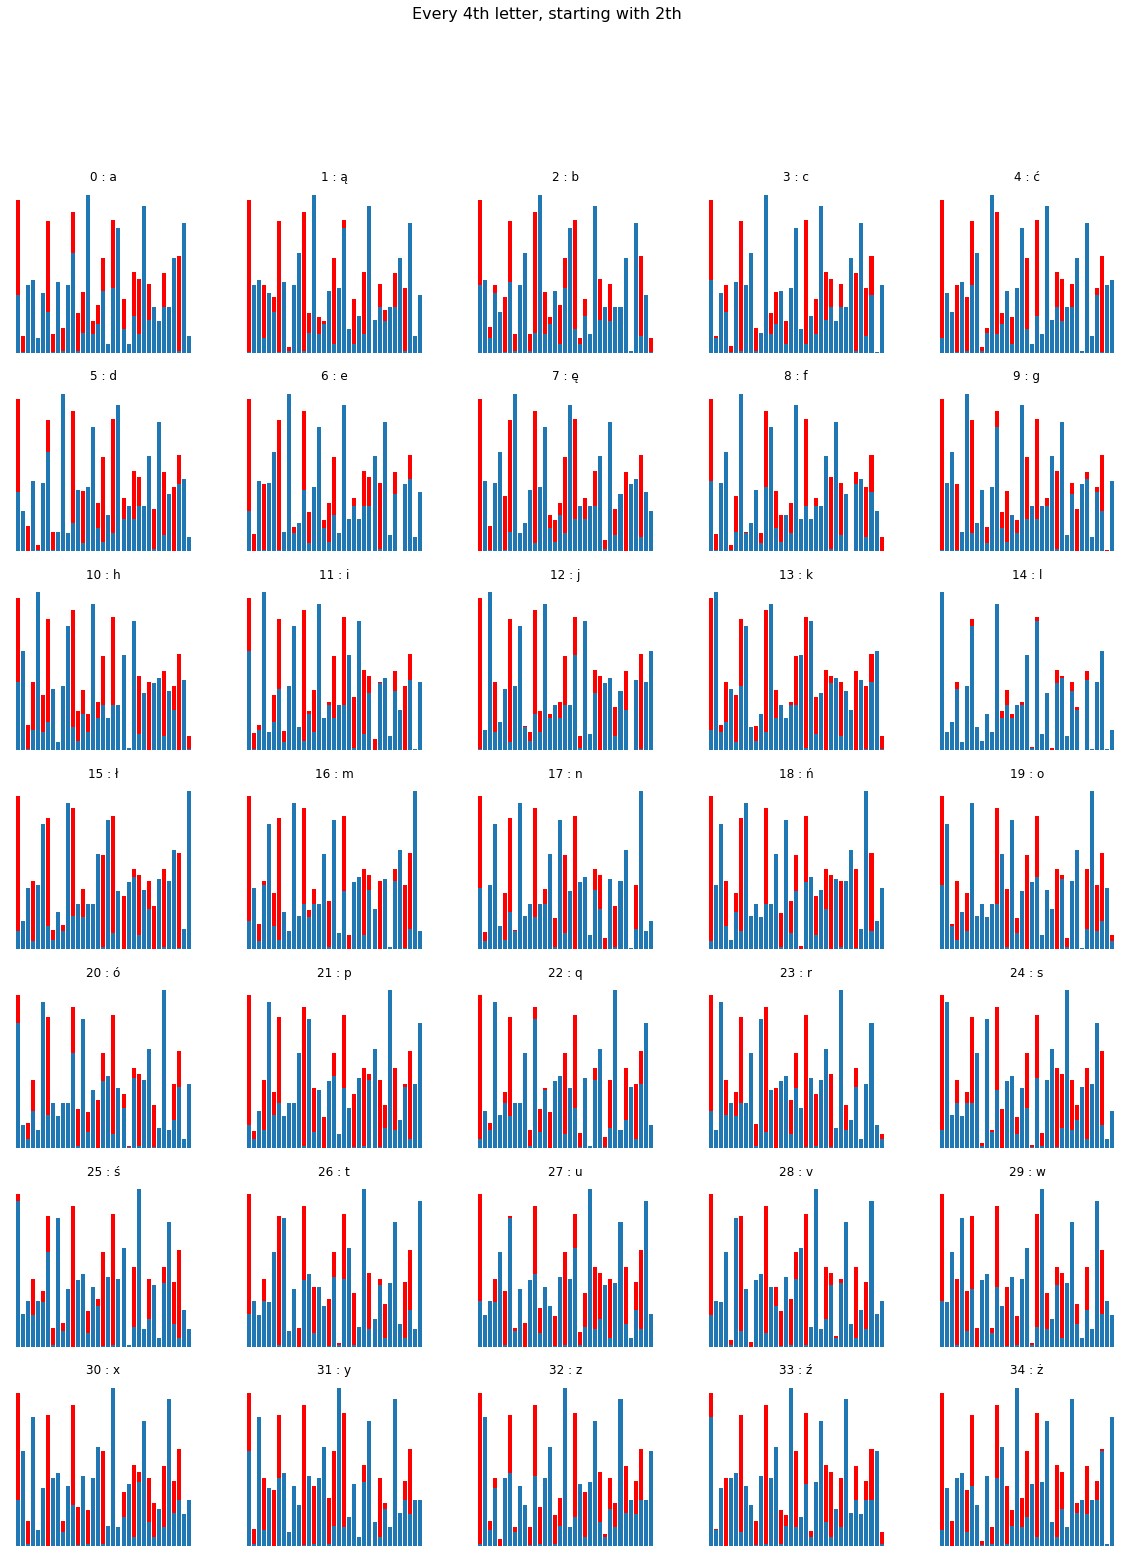

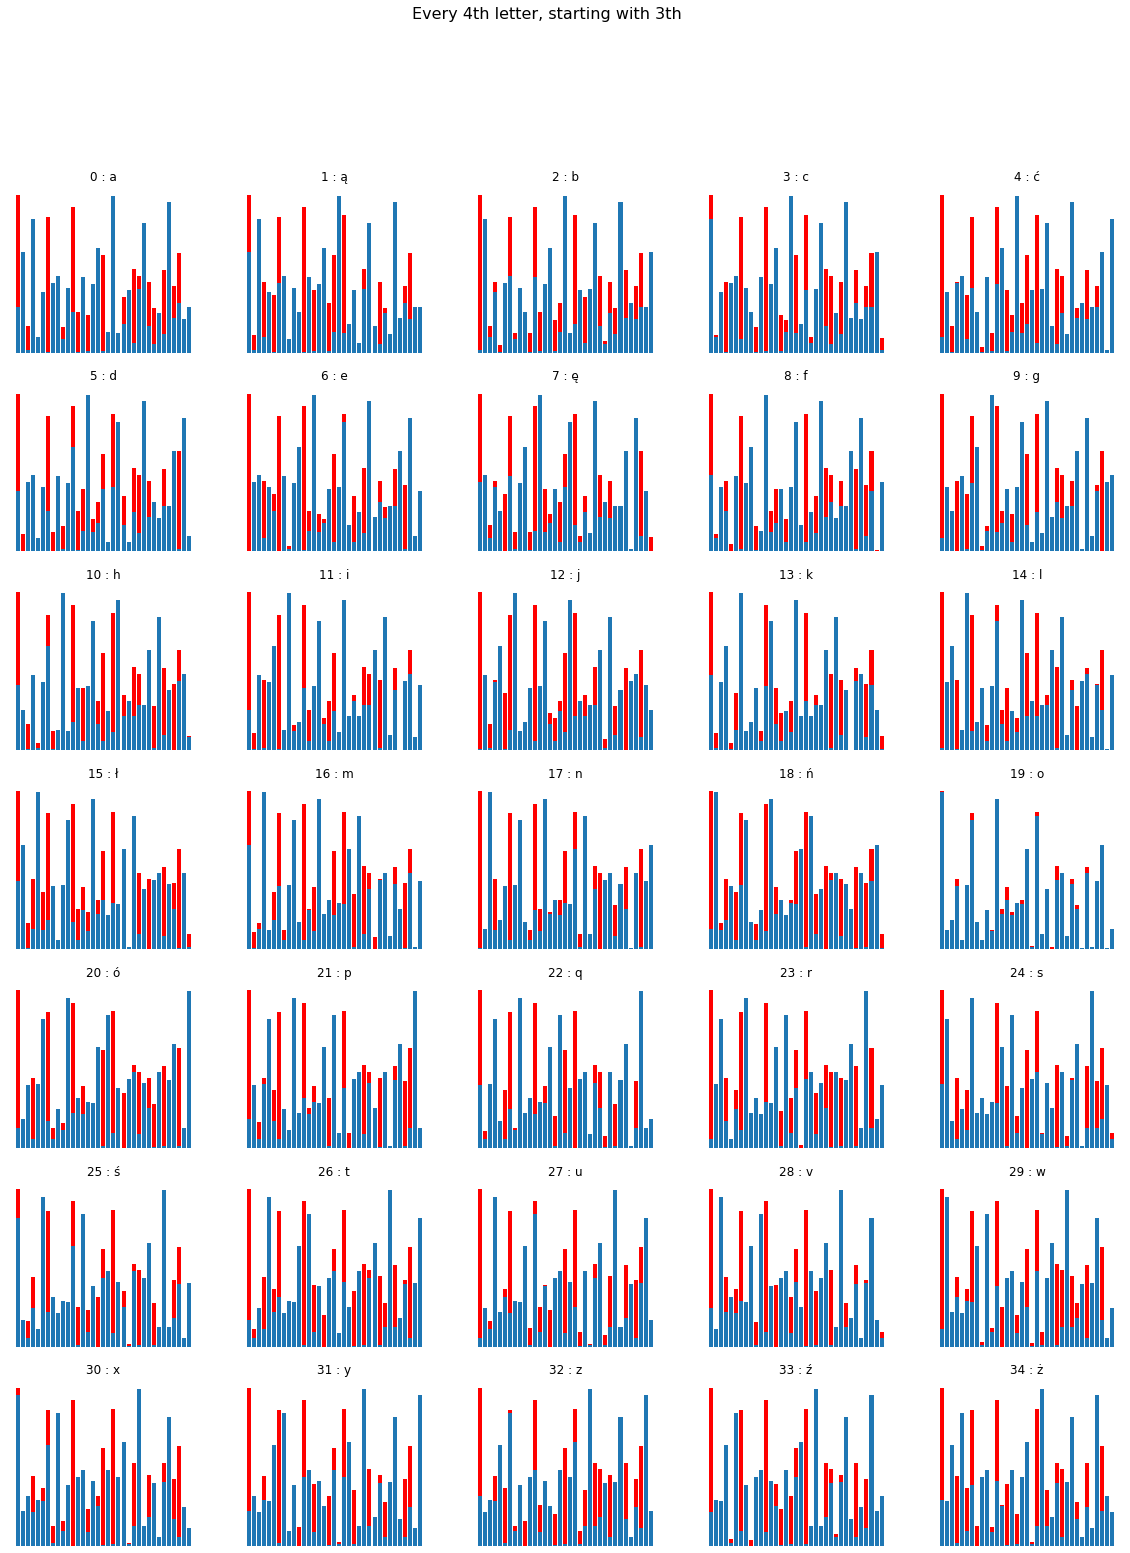

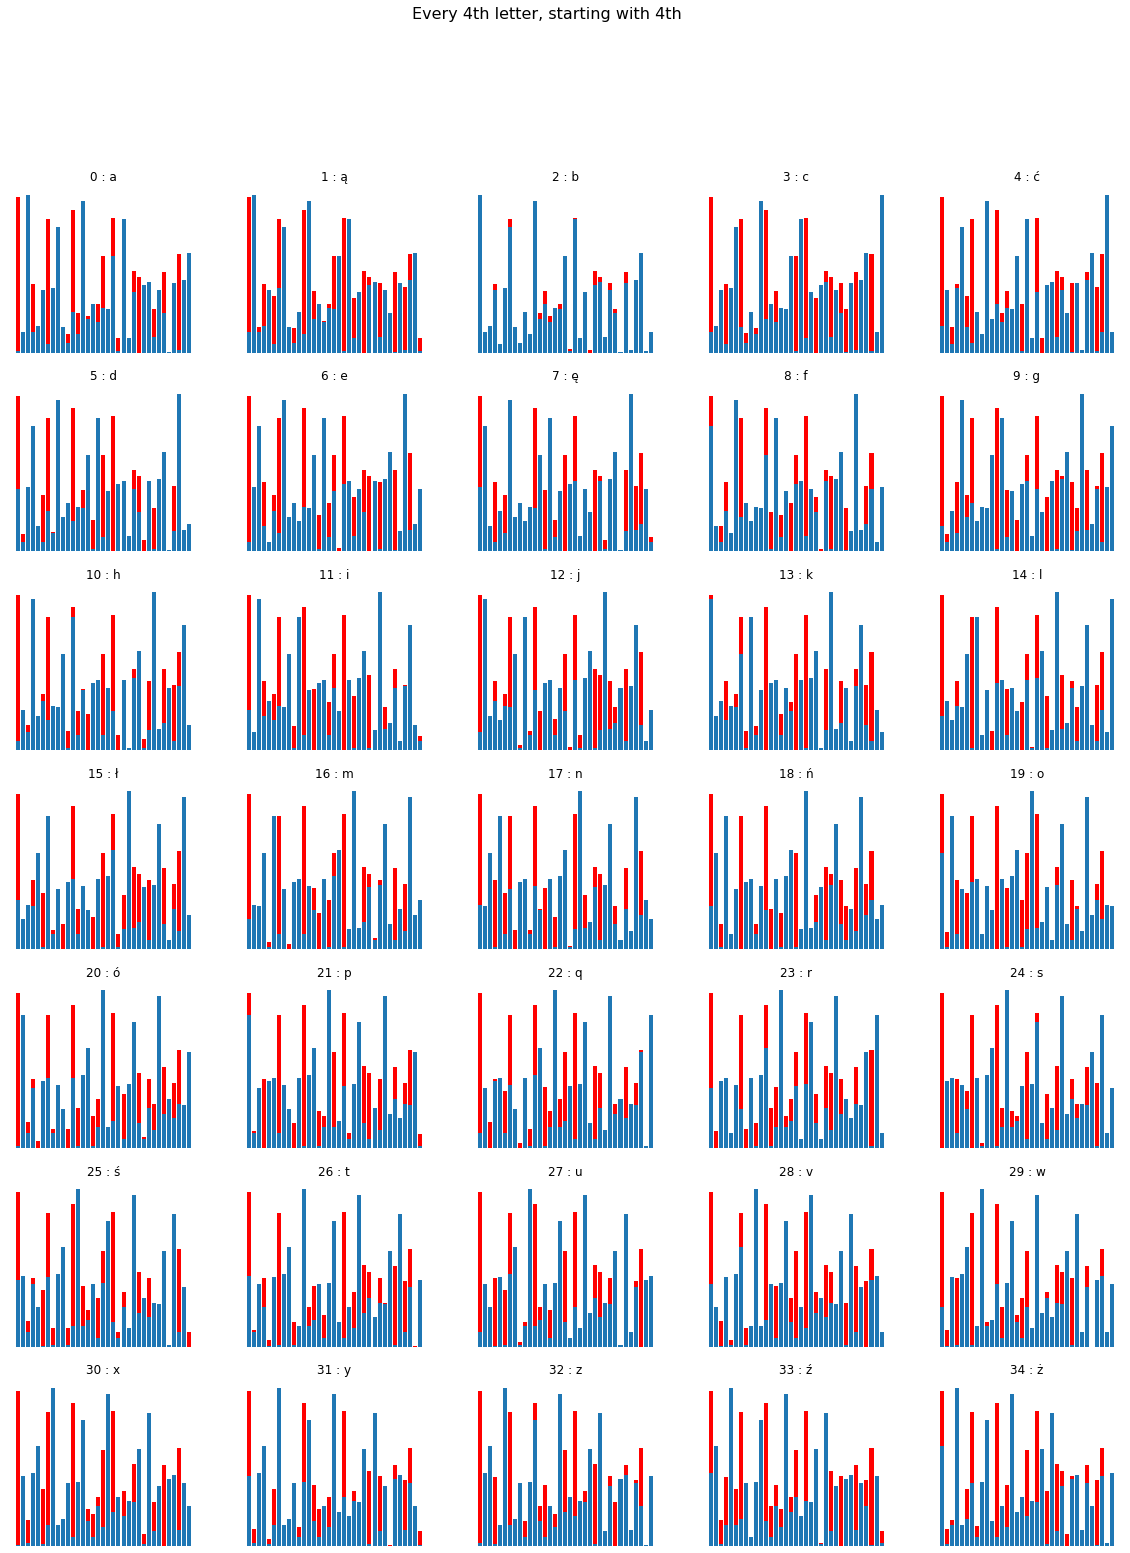

In [25]:
def rotate(a_list, key):
    return a_list[key:] + a_list[0:key]


N = 4

for n in range(N):
    fig, ax = plt.subplots(7, 5, figsize=(20, 25))
    fig.suptitle(f"Every 4th letter, starting with {n+1}th", fontsize=16)
    [axi.set_axis_off() for axi in ax.ravel()]
    
    only_letters_text = clear_text(ksiazka)
    counts = Counter(only_letters_text[n::N])
    
    counts = clear_dict(counts)
    letter_qty = sum(counts.values())
    counts = {letter: counts[letter] / letter_qty for letter in counts.keys()}
    
    for (x, y) in ((i, j) for i in range(7) for j in range(5)):
        axi = ax[x, y]
        key = x*5 + y
        axi.set_title(f"{key} : {alfabet[key]}")
        axi.bar(czestotliwosc.keys(), czestotliwosc.values(), color='red')
        axi.bar(counts.keys(), rotate(list(counts.values()), key))

### Klucz = 'glob'

In [23]:
key = 'glob'
print(Vignere_odszyfruj(ksiazka[0:3000], key))

Rozdział I. Phileas Fogg, zachwycony Obieżyświatem, przyjmuje go do służby

W roku 1872 dom pod numerem 7 przy Saville Row, Burlington Gardens, w którym w roku 1814 zmarł Sheridan, był zamieszkany przez Phileasa Fogga, członka londyńskiego klubu "Reforma", osobistość wybitną i wielce oryginalną.

Będąc synem słynnego mówcy angielskiego, Phileas Fogg był istotą zagadkową, o której, prócz tego, że odznaczał się elegancją i urodą, nic więcej nie wiedziano. Mówiono, że jest podobny do Byrona, naturalnie tylko z budowy głowy. Był to Byron z wąsami i faworytami; Byron niepodlegający żadnym cierpieniom, który mógłby żyć sto lat, zupełnie się nie starzejąc.

Anglik od pierwszego rzutu oka, Phileas Fogg nie wyglądał jednakże na londyńczyka. Nie widziano go nigdy ani na giełdzie, ani w banku, ani w żadnym kantorze w City. Nigdy na kanałach lub portach londyńskich nie ukazały się jego statki. Człowiek ten nie należał do żadnego komitetu administracyjnego; nie był ani kupcem, ani przemysłowcem, an